# Librerías.

In [1]:
#Librerías de interés.
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 

#from google.colab import files       #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.

from copy import deepcopy                            #Permite hacer copias profundas. 

#!pip install yellowbrick --upgrade                   #Instala y actualiza la librería yellowbrick (la versión por defecto en Google Colab está desactualizada).

from numpy.random import default_rng                 #Generador de números pseudo aleatorios. 

# Generador de datos sintéticos.

In [2]:
#Vamos a crear algunas observaciones del atributo de entrada. 
#Cada fila del vector columna es una observación. 
x = np.arange(-10,10,0.05).reshape((-1,1))

#Variable de salida sin ruido (en realidad esto nunca se conoce).
t      = 5 + 3*x                #t=w0_ideal+w1_ideal*x

#Número de observaciones disponibles.
m = x.shape[0]  

#Ahora vamos a contaminar la variable t con ruido tomando de una distribución normal
#con media cero y una desviación estándar dada.
random_seed = 123 
media       = 0   
std_dev     = 5
rng         = default_rng(seed = random_seed)
noise       = (media + (std_dev)*( rng.standard_normal(m) )).reshape((-1,1))

#Variable de salida contaminada (esta es la que uno observaría)
y       = t +noise

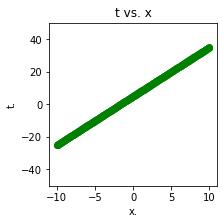

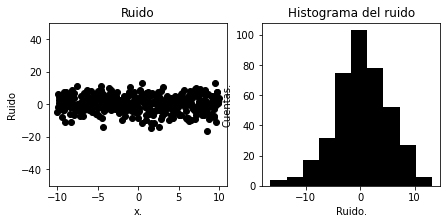

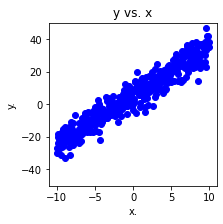

In [3]:
#Gráficas de los datos.

y_limits=(-50,50) #Esta tupla nos va a permitir mostrar el eje y con los mismos límites.

plt.figure(figsize=(3,3))
plt.scatter(x,t,color='green')
plt.xlabel('x.')
plt.ylabel('t.')
plt.title('t vs. x')
plt.ylim(y_limits)
plt.show()

fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].scatter(x,noise,color='black')
ax[0].set_xlabel('x.')
ax[0].set_ylabel('Ruido')
ax[0].set_title('Ruido')
ax[0].set_ylim(y_limits)

ax[1].hist(noise,color='black')
ax[1].set_xlabel('Ruido.')
ax[1].set_ylabel('Cuentas.')
ax[1].set_title('Histograma del ruido')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(x,y,color='blue')
plt.xlabel('x.')
plt.ylabel('y.')
plt.title('y vs. x')
plt.ylim(y_limits)
plt.show()

# Preparación del conjunto de datos.

In [4]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_validacion    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_validacion = particion_para_entrenamiento+particion_para_validacion #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_validacion #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
x_rest, x_test, y_rest, y_test = train_test_split(x,                                         #100% de los datos de entrada. 
                                                  y,                                         #100% de los datos de salida. 
                                                  test_size=particion_para_pruebas, 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
x_train, x_val, y_train, y_val = train_test_split(x_rest,                                    #Una fracción de los datos de entrada. 
                                                  y_rest,                                    #Una fracción de los datos de salida.        
                                                  test_size=particion_para_validacion/particion_para_entrenamiento_y_validacion, #cuidado! este es el porcentaje respecto al "resto". 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('Conjunto de datos de entrenamiento {:1.0f}% = {} ejemplos.'.format(particion_para_entrenamiento*100,x_train.shape[0]))
print('Conjunto de datos de validación    {:1.0f}% = {} ejemplos.'.format(particion_para_validacion*100,x_val.shape[0]))
print('Conjunto de datos de prueba        {:1.0f}% = {} ejemplos.'.format(particion_para_pruebas*100,x_test.shape[0]))

Conjunto de datos de entrenamiento 60% = 240 ejemplos.
Conjunto de datos de validación    20% = 80 ejemplos.
Conjunto de datos de prueba        20% = 80 ejemplos.


In [5]:
#Escalado del atributo de entrada. 
rango_de_salida_de_las_variables_escaladas = (-1,1)  #Tupla con el siguiente formato: (mínimo deseado, máximo deseado).
scaler = MinMaxScaler(feature_range=rango_de_salida_de_las_variables_escaladas)  #Instanciamos el objeto para escalar los datos. 

scaler.fit(x_train) #Ajustamos los datos de entrenamiento.

x_train_scaled = scaler.transform(x_train)  #Transformamos los datos de entrenamiento.
x_val_scaled   = scaler.transform(x_val)    #Transformamos los datos de validación.
x_test_scaled  = scaler.transform(x_test)   #Transformamos los datos de pruebas


# Gradiente descendente.

**Modelo de predicción:**

\begin{equation}
{y_{pred}}\left( {\textbf{w},x^{(j)}} \right) = {w_0} + {w_1}x^{(j)}\\
\end{equation}

*Nota:* el superíndice $^{(j)}$ en la expresión anterior hace referencia a la j-ésima observación.

**Función de costo:**

\begin{equation}
J = \frac{1}{m}\sum\limits_{j = 1}^m {{{\left( {y^{(j)} - {{y_{pred}}^{(j)}}} \right)}^2}} \\
\end{equation}

**Derivadas parciales de la función de costo respecto a los parámetros:**

\begin{equation}
\frac{{\partial J}}{{\partial {w_0}}} =  - \frac{2}{m}\sum\limits_{j = 1}^m {\left( {y^{(j)} - {{y_{pred}}^{(j)}}} \right)} \\
\end{equation}

\begin{equation}
\frac{{\partial J}}{{\partial {w_1}}} =  - \frac{2}{m}\sum\limits_{j = 1}^m {\left[ {\left( y^{(j)} - {{y_{pred}}^{(j)}} \right)x^{(j)}} \right]} \\
\end{equation}

**Gradiente:**

\begin{equation}
\nabla J = \left[ {\begin{array}{*{20}{c}}
{\frac{{\partial J}}{{\partial {w_0}}}}\\
{\frac{{\partial J}}{{\partial {w_1}}}}
\end{array}} \right]\\
\end{equation}

**Actualización de los coeficientes del modelo usando gradiente descendente:**

\begin{equation}
{\textbf{w}_{\text{iteracion} + 1}} = {\textbf{w}_{\text{iteracion}}} - \alpha \nabla J
\end{equation}

Donde $\alpha$ es la tasa de aprendizaje.


In [6]:
#-------------------------------------------------------------------------------
#Funciones
#-------------------------------------------------------------------------------
def prediccion_modelo(w,x):
  y=w[0,0]+w[1,0]*x
  return y  

def inicializar_pesos_modelo(random_seed):
  rng    = default_rng(seed = random_seed)
  w  = (rng.standard_normal(2)).reshape((-1,1)) #Vector columna de dos elementos.
  return w

def funcion_de_costo(y,w,x):
  m       = x.shape[0]
  y_pred = prediccion_modelo(w,x)
  SSE    = np.sum((y-y_pred)**2)
  J = (1/m)*SSE
  return J

def actualizar_pesos_con_gradiente_descendente(y,w,x,tasa_de_aprendizaje):
  y_pred    = prediccion_modelo(w,x)
  m = y_pred.shape[0]
  dJ_dw0 = (-2/m)*np.sum((y-y_pred))
  dJ_dw1 = (-2/m)*np.sum(np.multiply((y-y_pred),x))
  vector_gradiente = np.array([ [dJ_dw0],
                                [dJ_dw1] ])
 
  #Actualización en paralelo de TODOS los pesos (i.e.: w0 y w1).
  w = w - tasa_de_aprendizaje*vector_gradiente
  return w

# Aprendizaje: ajuste del modelo de predicción.

El modelo entrenado sería: ypred = 5.304 + 28.137 * x_escalado. 



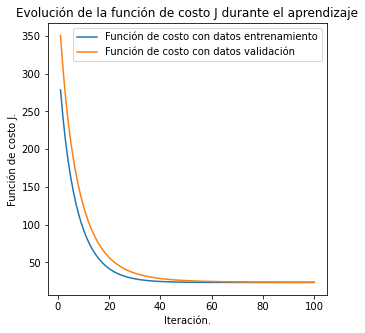

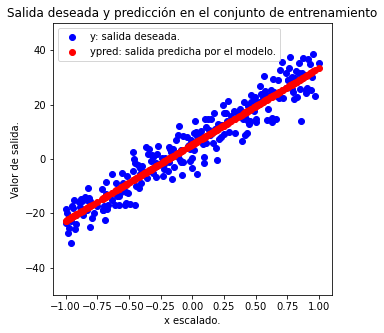

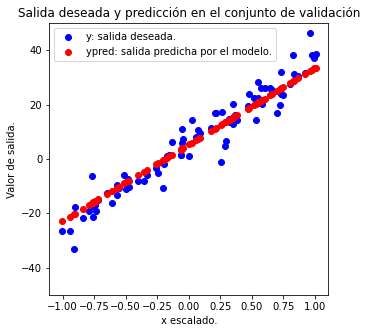

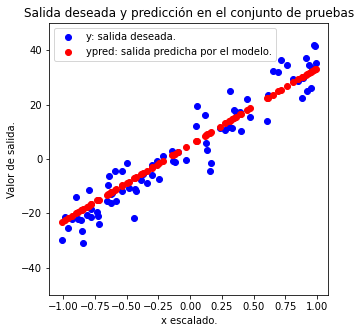

In [7]:
#-------------------------------------------------------------------------------
# Ajustemos el modelo a los datos usando el algoritmo de gradiente descendente.
#-------------------------------------------------------------------------------

#Hiperparámetros
num_iter            = 100
tasa_de_aprendizaje = 0.1

iteraciones = np.arange(1,num_iter+1,1).reshape((-1,1))
funcion_costo_entrenamiento_en_cada_iteracion= np.zeros((num_iter,1))   #Inicializamos un vector para guardar la función de costo de entrenamiento en cada iteración. 
funcion_costo_validacion_en_cada_iteracion   = np.zeros((num_iter,1))   #Inicializamos un vector para guardar la función de costo de validación en cada iteración. 

#Inicializamos los pesos.
w = inicializar_pesos_modelo(random_seed)

for i in range(num_iter):

  #Minimizar la función de costo usando gradiente descendente.
  w = actualizar_pesos_con_gradiente_descendente(y_train, w, x_train_scaled, tasa_de_aprendizaje)

  #Vamos a calcular y a guardar la función de costo evaluada en el conjunto de entrenamiento.
  funcion_costo_entrenamiento_en_cada_iteracion[i,0] = funcion_de_costo(y_train, w, x_train_scaled)

  #Vamos a calcular y a guardar la función de costo evaluada en el conjunto de validación.
  funcion_costo_validacion_en_cada_iteracion[i,0]    = funcion_de_costo(y_val,   w, x_val_scaled  )

#¿Qué parámetros aprendió el modelo?
print('El modelo entrenado sería: ypred = {:.3f} + {:.3f} * x_escalado. \n'.format(w[0,0],w[1,0]))

#Ahora obtengamos las predicciones.
y_train_pred = prediccion_modelo(w,x_train_scaled)
y_val_pred   = prediccion_modelo(w,x_val_scaled)
y_test_pred  = prediccion_modelo(w,x_test_scaled)

#-------------------------------------------------------------------------------
#Gráficas.
#-------------------------------------------------------------------------------
plt.figure(figsize=(5,5))
plt.plot(iteraciones,funcion_costo_entrenamiento_en_cada_iteracion, label='Función de costo con datos entrenamiento')
plt.plot(iteraciones,funcion_costo_validacion_en_cada_iteracion,    label='Función de costo con datos validación')
plt.xlabel('Iteración.')
plt.ylabel('Función de costo J.')
plt.title('Evolución de la función de costo J durante el aprendizaje')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(x_train_scaled,y_train,'bo',label='y: salida deseada.')
plt.plot(x_train_scaled,y_train_pred,'ro',label='ypred: salida predicha por el modelo.') 
plt.xlabel('x escalado.')
plt.ylabel('Valor de salida.')
plt.title('Salida deseada y predicción en el conjunto de entrenamiento')
plt.ylim(y_limits)
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(x_val_scaled,y_val,'bo',label='y: salida deseada.')
plt.plot(x_val_scaled,y_val_pred,'ro',label='ypred: salida predicha por el modelo.') 
plt.xlabel('x escalado.')
plt.ylabel('Valor de salida.')
plt.title('Salida deseada y predicción en el conjunto de validación')
plt.ylim(y_limits)
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(x_test_scaled,y_test,'bo',label='y: salida deseada.')
plt.plot(x_test_scaled,y_test_pred,'ro',label='ypred: salida predicha por el modelo.') 
plt.xlabel('x escalado.')
plt.ylabel('Valor de salida.')
plt.title('Salida deseada y predicción en el conjunto de pruebas')
plt.ylim(y_limits)
plt.legend()
plt.show()

In [8]:
funcion_costo_entrenamiento_en_cada_iteracion

array([[278.57041803],
       [240.68622459],
       [209.70823412],
       [183.98954386],
       [162.37149232],
       [144.02093874],
       [128.3244955 ],
       [114.81941312],
       [103.14810042],
       [ 93.02792651],
       [ 84.23093922],
       [ 76.57004904],
       [ 69.88945522],
       [ 64.05787805],
       [ 58.96366698],
       [ 54.51117908],
       [ 50.61803179],
       [ 47.21296873],
       [ 44.23416468],
       [ 41.62785278],
       [ 39.34719373],
       [ 37.35133142],
       [ 35.60459533],
       [ 34.07582096],
       [ 32.73776686],
       [ 31.56661201],
       [ 30.5415207 ],
       [ 29.6442648 ],
       [ 28.85889509],
       [ 28.17145487],
       [ 27.56973009],
       [ 27.04303115],
       [ 26.58200226],
       [ 26.17845473],
       [ 25.82522125],
       [ 25.51602838],
       [ 25.24538498],
       [ 25.00848467],
       [ 24.80112037],
       [ 24.61960956],
       [ 24.46072888],
       [ 24.32165686],
       [ 24.19992382],
       [ 24

#  ¿Por qué y cómo funciona el gradiente descendente?

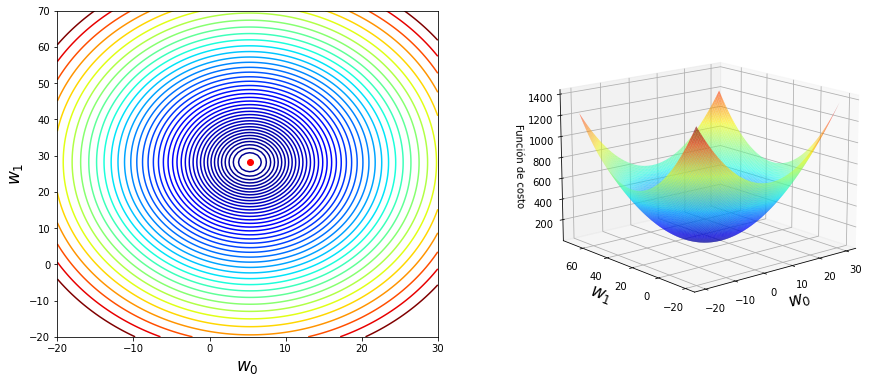

In [9]:
# Create las coordenadas de la cuadrícula para graficar.
w0 = np.linspace(-20, 30, 100)
w1 = np.linspace(-20, 70, 100)
xx, yy = np.meshgrid(w0, w1, indexing='xy')
Z = np.zeros((w0.size,w1.size))

# Vamos a graficar en la altura Z, la función de costo a partir de los coeficientes de la cuadrícula. 
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = funcion_de_costo(y_train, np.array([[xx[i,j]], [yy[i,j]]]), x_train_scaled)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Gráfica izquierda.
CS = ax1.contour(xx, yy, Z, np.logspace(1, 3, 50), cmap=plt.cm.jet)
ax1.scatter(w[0,0],w[1,0], c='r')  #Solución actual. 

# Gráfico derecha.
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Función de costo')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# Ajustes comunes.
for ax in fig.axes:
    ax.set_xlabel('$w_0$', fontsize=17)
    ax.set_ylabel('$w_1$', fontsize=17)

# Librerías adicionales.

In [10]:
#-------------------------------------------------------------------------------
#Librerías adicionales
#-------------------------------------------------------------------------------

# Métricas.
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from scipy.stats import pearsonr

# Regresión lineal en scikit-learn.
from sklearn.linear_model import LinearRegression

# QQplot
from scipy.stats import  probplot

# Mínimos cuadrados ordinarios (OLS).

\begin{equation}
w = {\left( {{X^T}X} \right)^{ - 1}}{X^T}y
\end{equation}

Donde:
*   $w$ es un vector columna con los coeficientes ${\left[ {{w_0},{w_1}} \right]^T}$
*   $X$ es una matriz de dimensión $m \times (n+1)$, que se obtiene 
anteponiéndole una columna de unos de dimensión $m\times1$ a la matriz con las observaciones de los atributos de entrada originales de dimensión $m \times n$, .
*   $y$ es un vector columna de dimensión $m\times1$ con las observaciones de la salida deseada.

Consulte el procedimiento para obtener esta expresión en: https://en.wikipedia.org/wiki/Least_squares

In [11]:
#-------------------------------------------------------------------------------
#Funciones para implementar mínimos cuadrados ordinarios 
#(ordinary least square o OLS).
#-------------------------------------------------------------------------------

def prepend_a_column_of_ones(x):
  rows, columns = x.shape #Obtenemos las dimensiones de la "matriz" x.
  x_new = np.ones((rows,columns+1)) # Se va a añadir una columna llena de unos en la primera columna de la matrix x.
  x_new[:,1:] = x
  return x_new

def custom_OLS(x,y):
  x_new=prepend_a_column_of_ones(x)
  w = np.matmul(np.matmul( np.linalg.inv( np.matmul(x_new.T, x_new) ), x_new.T) , y) #OLS:
  return w #Vector columna.


# Comparando resultados de diferentes librerías.

In [12]:
#-------------------------------------------------------------------------------
# Comparemos los coeficientes w que se pueden estimar con diferentes funciones
#-------------------------------------------------------------------------------
#Usando scikit-learn:
modelo_regresion_simple = LinearRegression(fit_intercept=True)  # Instanciamos el objeto de regresión lineal y le indicamos a scikit-learn que estime también el intercepto.
modelo_regresion_simple.fit(x_train_scaled,y_train)             # Encontramos los coeficientes.     
w0_scikit = modelo_regresion_simple.intercept_                  # intercept_ retorna el coeficiente correspondiente al intercepto, es decir w0, como un numpy array.
w1_scikit = modelo_regresion_simple.coef_                       # coef_ retorna el resto de los coeficientes wi como un numpy array. Para la regresión simple, retorna w1.
#Nota: revisen los tipos y dimensiones de lo que retorna scikit-learn.
print('El tipo de w0_scikit es {}, y sus dimensiones son {}'.format(type(w0_scikit), w0_scikit.shape))
print('El tipo de w1_scikit es {}, y sus dimensiones son {}\n'.format(type(w1_scikit), w1_scikit.shape))

#Usando mínimos cuadrados ordinarios "a mano":
w_          = custom_OLS(x_train_scaled,y_train) 

#Usando mínimos cuadrados ordinarios en numpy:
w_OLS_numpy = np.linalg.lstsq(prepend_a_column_of_ones(x_train_scaled),y_train, rcond=None)[0]  #Sólo nos interesan los coeficientes.

print('Comparemos los coeficientes que encontramos:')
print('El modelo entrenado con gradiente descendente es ypred = {:.3f} + {:.3f} * x_escalado.'.format(w[0,0],           w[1,0]))
print('El modelo entrenado con scikit-learn          es ypred = {:.3f} + {:.3f} * x_escalado.'.format(w0_scikit[0],     w1_scikit[0,0]))
print('El modelo entrenado con OLS custom            es ypred = {:.3f} + {:.3f} * x_escalado.'.format(w_[0,0],          w_[1,0]))
print('El modelo entrenado con OLS de numpy          es ypred = {:.3f} + {:.3f} * x_escalado.'.format(w_OLS_numpy[0,0], w_OLS_numpy[1,0]))

# # ¿A qué cree que se deben las diferencias entre los coeficientes estimados con gradiente descendente
# # y los otros métodos?


El tipo de w0_scikit es <class 'numpy.ndarray'>, y sus dimensiones son (1,)
El tipo de w1_scikit es <class 'numpy.ndarray'>, y sus dimensiones son (1, 1)

Comparemos los coeficientes que encontramos:
El modelo entrenado con gradiente descendente es ypred = 5.304 + 28.137 * x_escalado.
El modelo entrenado con scikit-learn          es ypred = 5.304 + 28.173 * x_escalado.
El modelo entrenado con OLS custom            es ypred = 5.304 + 28.173 * x_escalado.
El modelo entrenado con OLS de numpy          es ypred = 5.304 + 28.173 * x_escalado.


# Predicciones con el modelo de scikit-learn.

In [13]:
#-------------------------------------------------------------------------------
# Usemos el modelo scikit-learn y estimemos de nuevo nuevas predicciones
#-------------------------------------------------------------------------------

#Vamos a reemplazar las predicciones que teníamos con las que se obtendrían
#si usáramos el scikit-learn. 
y_train_pred = modelo_regresion_simple.predict(x_train_scaled)
y_val_pred   = modelo_regresion_simple.predict(x_val_scaled)
y_test_pred  = modelo_regresion_simple.predict(x_test_scaled)

y            = y_test
y_pred       = y_test_pred

# Métricas para evaluar la regresión.

**Error absoluto medio:**
\begin{equation}
MAE = \frac{1}{m}\sum\limits_{j = 1}^m {\left| {{y^{\left( j \right)}} - {y_{pred}}^{\left( j \right)}} \right|} \\
\end{equation}


**Error cuadrático medio:**
\begin{equation}
MSE = \frac{1}{m}\sum\limits_{j = 1}^m {\left[ {{{\left( {{y^{\left( j \right)}} - {y_{pred}}^{\left( j \right)}} \right)}^2}} \right]} \\
\end{equation}


**Raíz cuadrada del error cuadrático medio:**
\begin{equation}
RMSE = \sqrt {\frac{1}{m}\sum\limits_{j = 1}^m {\left[ {{{\left( {{y^{\left( j \right)}} - {y_{pred}}^{\left( j \right)}} \right)}^2}} \right]} } \\
\end{equation}

**Coeficiente de correlación de Pearson entre las variables $y$ e $y_{pred}$ de la muestra:**
\begin{equation}
{r_{y{y_{pred}}}} = \frac{{\sum\limits_{j = 1}^m {\left[ {\left( {{y^{\left( j \right)}} - \bar y} \right)\left( {{y_{pred}}^{\left( j \right)} - {{\bar y}_{pred}}} \right)} \right]} }}{{\sqrt {\sum\limits_{j = 1}^m {\left[ {{{\left( {{y^{\left( j \right)}} - \bar y} \right)}^2}} \right]} } \sqrt {\sum\limits_{j = 1}^m {\left[ {{{\left( {{y_{pred}}^{\left( j \right)} - {{\bar y}_{pred}}} \right)}^2}} \right]} } }}
\end{equation}

**Coeficiente de determinación:**
\begin{equation}
{R^2} = 1 - \frac{{\sum\limits_{j = 1}^m {\left[ {{{\left( {{y^{\left( j \right)}} - {y_{pred}}^{\left( j \right)}} \right)}^2}} \right]} }}{{\sum\limits_{j = 1}^m {\left[ {{{\left( {{y^{\left( j \right)}} - \bar y} \right)}^2}} \right]} }}\\
\end{equation}

**Coeficiente de determinación ajustado:**
\begin{equation}
R_{adj}^2 = 1 - \left[ {\left( {1 - {R^2}} \right)\frac{{\left( {m - 1} \right)}}{{\left( {m - p - 1} \right)}}} \right]
\end{equation}

En las expresiones anteriores
*   $y^{\left( j \right)}$: j-ésima observación de la salida. 
*   ${y_{pred}}^{\left( j \right)}$: j-ésima predicción.
*   $\bar{y}$: media aritmética de las observaciones de salida. 
*   ${\bar y}_{pred}$: media aritmética de las predicciones. 
*   $m$: número de observaciones. 
*   $p$: número de variables explicativas del modelo.

In [14]:
#-------------------------------------------------------------------------------
#Funciones de métricas de regresión
#-------------------------------------------------------------------------------
def custom_MSE(y, y_pred):
  RSS = np.sum( (y-y_pred)**2 )
  m   = len(y)
  MSE = RSS/m
  return MSE

def custom_RMSE(y, y_pred):
  RMSE = np.sqrt(custom_MSE(y, y_pred))
  return RMSE

def custom_MAE(y, y_pred):
  m = len(y)
  MAE = np.sum( np.abs(y-y_pred) )/m
  return MAE

def custom_Pearson(y, y_pred):
  y_minus_its_mean      = y     - np.mean(y)
  y_pred_minus_its_mean = y_pred - np.mean(y_pred)

  # Opción 1: Cálculo usando las expresiones simplificadas para la muestra:
  num1 = np.sum( np.multiply(y_minus_its_mean, y_pred_minus_its_mean) )
  den1 = np.sqrt(np.sum(y_minus_its_mean**2))
  den2 = np.sqrt(np.sum(y_pred_minus_its_mean**2))
  pearson_r  = num1/(den1*den2)

  # #Opción 2: Cálculo usando la expresión a partir de los valores esperados:
  # cov_y_y_pred = np.mean( np.multiply(y_minus_its_mean, y_pred_minus_its_mean) )
  # std_y        = np.sqrt(np.mean(y_minus_its_mean**2))
  # std_ypred    = np.sqrt(np.mean(y_pred_minus_its_mean**2))
  # pearson_r    = cov_y_y_pred/(std_y*std_ypred)

  return pearson_r

def custom_R2(y, y_pred):
  y_mean = np.mean(y)
  num    = np.sum( (y-y_pred)**2 )
  denom  = np.sum( (y-y_mean)**2 )
  R2     = 1-num/denom
  return R2

def custom_R2adj(y, y_pred, p=1):
  m      = len(y)
  R2     = custom_R2(y, y_pred)
  Radj   = 1 - (1-R2)*(m-1)/(m-p-1)
  return Radj

# Comparación de las métricas.

In [15]:
#-------------------------------------------------------------------------------
# Revisemos los valores de las métricas que ofrecen las librerías y nuestra
# implementación directa. 
#-------------------------------------------------------------------------------
MSE   = mean_squared_error(y, y_pred, squared = True )
MSE_  = custom_MSE(y, y_pred)
print('MSE scikit-learn   = {}.'.format(MSE))
print('MSE custom         = {}.'.format(MSE_))

RMSE  = mean_squared_error(y, y_pred, squared = False)
RMSE_ = custom_RMSE(y, y_pred)
print('\nRMSE scikit-learn  = {}.'.format(RMSE))
print('RMSE custom        = {}.'.format(RMSE_))

MAE  = mean_absolute_error(y, y_pred)
MAE_ = custom_MAE(y, y_pred)
print('\nMAE scikit-learn   = {}.'.format(MAE))
print('MAE custom         = {}.'.format(MAE_))

pearson_r_ =         custom_Pearson(y, y_pred) 
pearson_r, p_value = pearsonr(y.ravel(), y_pred.ravel())   #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
print("\nPearson's r scipy  = {}.".format(pearson_r))
print("Pearson's r custom = {}.".format(pearson_r_))

R2    = r2_score(y, y_pred)  #Nota: scikit-learn NO retorna -inf sino 0 en esta función (fue una decisión de los desarrolladores), ver: líneas 702-704:
                             #https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/metrics/_regression.py#L587
R2_   = custom_R2(y, y_pred)
print('\nR^2 scikit-learn   = {}.'.format(R2))
print('R^2 custom         = {}.'.format(R2_))

Radj_ = custom_R2adj(y, y_pred, p=1)  #Usamos p igual a uno pues el modelo sólo tiene una variable explicativa.
print('\nR2_adj custom      = {}. Note que el R^2 ajustado es menor que el R^2.\n'.format(Radj_))

MSE scikit-learn   = 33.676982311951676.
MSE custom         = 33.676982311951676.

RMSE scikit-learn  = 5.803187254599982.
RMSE custom        = 5.803187254599982.

MAE scikit-learn   = 4.67895688498051.
MAE custom         = 4.67895688498051.

Pearson's r scipy  = 0.9601722671809894.
Pearson's r custom = 0.9601722671809892.

R^2 scikit-learn   = 0.9152438493547652.
R^2 custom         = 0.9152438493547652.

R2_adj custom      = 0.9141572320388006. Note que el R^2 ajustado es menor que el R^2.



# Análisis de residuos.

Análisis sobre el conjunto de prueba.


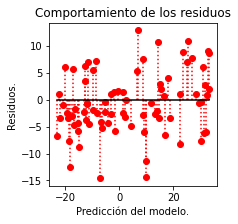

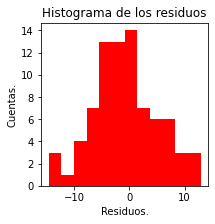

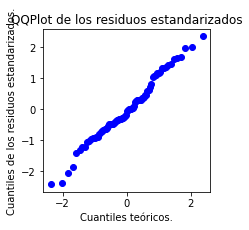

In [16]:
#-------------------------------------------------------------------------------
#Análisis de residuos.
#-------------------------------------------------------------------------------
#Selección del conjunto
#conjunto = 'entrenamiento'   
#conjunto = 'validacion'  
conjunto = 'pruebas'

#-------------------------------------------------------------------------------
if conjunto=='entrenamiento':
  prediccion = y_train_pred
  residuos   = y_train - y_train_pred
  print('Análisis sobre el conjunto de entrenamiento.')
elif conjunto=='validacion':
  prediccion = y_val_pred
  residuos   = y_val - y_val_pred
  print('Análisis sobre el conjunto de validación.')
elif conjunto=='pruebas':
  prediccion = y_test_pred
  residuos   = y_test - y_test_pred
  print('Análisis sobre el conjunto de prueba.')
else:
  print('Selección inválida')
#-------------------------------------------------------------------------------

#Algunas constantes.
figsize=(3,3)  #Tamaño de cada figura
num_bins = 12  #Número de bins del histograma

#Comportamiento de los residuos vs. las predicciones.
fig = plt.figure(figsize=figsize)
plt.stem(prediccion.ravel(),residuos.ravel(), markerfmt='ro', linefmt='r:', basefmt='k-',use_line_collection=True)
plt.title('Comportamiento de los residuos')
plt.xlabel('Predicción del modelo.')
plt.ylabel('Residuos.')
plt.show()

#Histograma de residuos.
fig = plt.figure(figsize=figsize)
plt.hist(residuos,bins=num_bins,color='red')
plt.title('Histograma de los residuos')
plt.xlabel('Residuos.')
plt.ylabel('Cuentas.')
plt.show()

#QQPlot
residuos_estandarizados = (residuos-np.mean(residuos))/np.std(residuos)  #Estandarizamos los residuos para facilitar la comparación en el QQplot
plt.figure(figsize=figsize)
probplot(residuos_estandarizados.ravel(), dist="norm", plot=plt, fit=False)  #QQplot de los residuos respecto a una distribución normal. 
plt.title('QQPlot de los residuos estandarizados')
plt.xlabel('Cuantiles teóricos.')
plt.ylabel('Cuantiles de los residuos estandarizados.')
plt.show()